In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow  as tf
import cv2 

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# DOG and CAt classifier using cnn

In [3]:
import cv2
import os

In [4]:
path1 =r"D:\catdog"
cate =['cats','dogs']
# according to ypur folder settings

In [5]:
for i in cate:
    folders=os.path.join(path1,i)
    print(folders)
# only for understanding 

D:\catdog\cats
D:\catdog\dogs


In [6]:
for i in cate:
    folders=os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path =os.path.join(folders, image)
        print(image_path)
        
# only for understading        

D:\catdog\cats\cat 1.png
D:\catdog\cats\cat 3.png
D:\catdog\cats\cat10.png
D:\catdog\cats\cat11.png
D:\catdog\cats\cat12.png
D:\catdog\cats\cat2.png
D:\catdog\cats\cat4.png
D:\catdog\cats\cat5.png
D:\catdog\cats\cat6.png
D:\catdog\cats\cat7.png
D:\catdog\cats\cat8.png
D:\catdog\cats\cat9.png
D:\catdog\dogs\dog1.png
D:\catdog\dogs\dog10.png
D:\catdog\dogs\dog11.png
D:\catdog\dogs\dog12.png
D:\catdog\dogs\dog2.png
D:\catdog\dogs\dog3.png
D:\catdog\dogs\dog4.png
D:\catdog\dogs\dog5.png
D:\catdog\dogs\dog6.png
D:\catdog\dogs\dog7.png
D:\catdog\dogs\dog8.png
D:\catdog\dogs\dog9.png


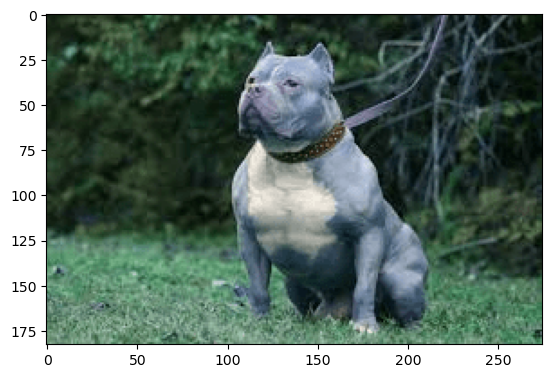

In [7]:
for i in cate:
    folders =os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders,image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break
 # just for understanding 
# just to show case that images have been read

In [8]:
image_size=200

path1 =r"D:\catdog"
cate  =["dogs","cats"]
input_image=[]
for i in cate:
    folders =os.path.join(path1,i)
    label   =cate.index(i)
    for image in os.listdir(folders):
        image_path =os.path.join(folders ,image)
        image_array =cv2.imread(image_path)
        image_array = cv2.resize(image_array ,(image_size , image_size))
        input_image.append([image_array , label])



In [9]:
len(input_image)

24

In [10]:
#cv2.imread("D:\catdog\cats\cat5.png")

In [11]:
# sampling----> shuffling (take 1st 80% as train and rest 20% as test)
# as good as random sampling

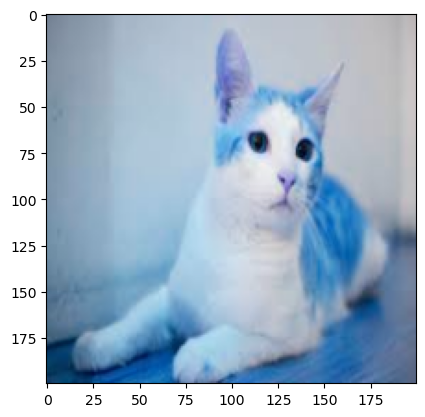

In [12]:
np.random.shuffle(input_image)
X=[]
Y=[]

for x_values , labels in input_image:
        X.append(x_values)
        Y.append(labels)

plt.imshow(X[1]) # show the image        

In [13]:
# we have 10000 images divided into train and test would have been like 
#_train =X[0:8000]
#_train =y[0:8000]

#_test  =X[8000:10000]
#_test  =Y[8000:10000]

In [14]:
X =np.array(X)
Y =np.array(Y)

In [15]:
X=X/255
# run  after your array 

In [16]:
Y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1])

In [17]:
# over here we have very few images so we are not doing train and test
# and netural netowrks modle we need thousands of images to get good model

In [18]:
from keras import Sequential
from keras.layers import Conv2D ,MaxPool2D,Flatten,Dense,Dropout,AvgPool2D


In [19]:
model =Sequential()
model.add(Conv2D(filters=16 ,kernel_size =(3,3),activation ="relu" , ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128 , activation ='relu' , input_shape =X.shape[1:]))

model.add(Dense(2,activation='softmax'))

In [20]:
model.compile(optimizer='adam' ,loss ='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [21]:
model.fit(X,Y , epochs=20)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.7055 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 369ms/step - loss: 38.1172 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 374ms/step - loss: 17.0231 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 384ms/step - loss: 11.4898 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 381ms/step - loss: 9.7331 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 396ms/step - loss: 8.3531 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 371ms/step - loss: 0.6211 - accuracy: 0.7917
Epoch 8/20
1/1 [==============================] - 0s 366ms/step - loss: 5.8254 - accuracy: 0.5417
Epoch 9/20
1/1 [==============================] - 0s 355ms/step - loss: 1.9689 - accuracy: 0.7500
Epoch 10/20
1/1 [==============================] - 0s 365ms/step - loss: 1.0563 - accuracy: 0.8750
Epoch 11/20
1/1 [==

In [22]:
pred=model.predict(X)

1/1 [==============================] - 0s 293ms/step


In [23]:
# increase data 1000 cats and 1000 dogs


In [24]:
pred_final=pred.argmax(axis=1)

In [25]:
from sklearn .metrics import confusion_matrix

In [26]:
tab=confusion_matrix(Y,pred_final)
tab

array([[11,  1],
       [ 0, 12]], dtype=int64)

In [27]:
tab.diagonal().sum()/tab.sum()

0.9583333333333334